In [206]:
import pandas as pd
import matplotlib.pyplot as plt


### The pandas `.concat( )`  method is used to concatenate two dataframes based on shared column names
- we will create two dataframes and then concatenate them
- this would be useful if you had, for example, two different years of data with the same columns that you want to explore together; in a case like this, you would want to add a year column before joining them


In [209]:
data_2023 = { 'state' : ['NY','WV','TN'],
         'count' : [14,55,63],
         'code' : ['ab65','88ui','u7r4']}
data_2024 = { 'state' : ['NY','WV','TN'],
         'count' : [7,78,29],
         'code' : ['0o09','jj33','1d6u']}

In [211]:
df_2023 = pd.DataFrame(data_2023)
df_2024 = pd.DataFrame(data_2024)

In [213]:
df_2023

,state,count,code
0,NY,14,ab65
1,WV,55,88ui
2,TN,63,u7r4


In [215]:
df_2024

,state,count,code
0,NY,7,0o09
1,WV,78,jj33
2,TN,29,1d6u


#### Before we concatenate `df_2023` and `df_2024` we need to add a column for the year

In [217]:
df_2023['year'] = '2023'
df_2024['year'] = '2024'

In [220]:
df_2023

,state,count,code,year
0,NY,14,ab65,2023
1,WV,55,88ui,2023
2,TN,63,u7r4,2023


In [221]:
concat_data = pd.concat([df_2023, df_2024])
concat_data

## Notice that the index repeats itself

,state,count,code,year
0,NY,14,ab65,2023
1,WV,55,88ui,2023
2,TN,63,u7r4,2023
0,NY,7,0o09,2024
1,WV,78,jj33,2024
2,TN,29,1d6u,2024


### The `reset_index( )` method will change these to a 0-based incrementing index
- add the `drop = True` argument to prevent saving the current index as a column


In [225]:
concat_data = concat_data.reset_index(drop = True)
concat_data

,state,count,code,year
0,NY,14,ab65,2023
1,WV,55,88ui,2023
2,TN,63,u7r4,2023
3,NY,7,0o09,2024
4,WV,78,jj33,2024
5,TN,29,1d6u,2024


### Another method for combining data is  `merge( )`
- First we'll read in the schools data again
- And we'll read in the school indicator scores


In [227]:
schools = pd.read_csv('../data/schools_clean.csv')
schools.head(2)

,level,name,zipcode,grade_k,grade_1,grade_2,grade_3,grade_4,grade_5,grade_6,...,hisp,p_islander,white,male,female,econ_disadv,disabled,limited_eng,lat,lng
0,Elementary School,A. Z. Kelley Elementary,37013,153.0,145.0,149.0,180.0,184.0,NaN,NaN,...,206,1.0,212.0,431,421,261,75.0,298.0,36.021817,-86.658848
1,Elementary School,Alex Green Elementary,37189,42.0,50.0,44.0,38.0,24.0,NaN,NaN,...,29,1.0,21.0,115,119,153,21.0,25.0,36.252961,-86.832229


In [228]:
indicators = pd.read_csv('../data/school_indicator_scores_suppressed.csv')
indicators.head(2)

,system,system_name,school,school_name,pool,designation_ineligible,subgroup,score_achievement,score_growth,score_absenteeism,score_grad,score_ready_grad,score_elpa
0,10,Anderson County,2,Anderson County High School,HS,0.0,All Students,3.0,4.0,4.0,4.0,4.0,NaN
1,10,Anderson County,2,Anderson County High School,HS,0.0,American Indian or Alaska Native,NaN,NaN,NaN,NaN,NaN,NaN


### Before we merge, we need to decide 
- which columns to keep from each dataframe  
- what _type_ of merge we want

#### Let's say we want to look at the effect of poverty on school indicators
- From the schools data, we need name, total number of students, and total who are economically disadvantaged
    - we need to create a column for the total number of students before we can subset the schools dataframe
- From the school indicators dataframe, we need school name, and the six *score* columns
    - filtering the dataframe first so that we only look at Davidson County schools is a good idea
    - we also want to filter in order to keep only the rows where subgroup is "All Students"


# [[    ]] slices to pick for new df


In [235]:
schools_subset = schools[['name', 'total_students', 'econ_disadv']]
schools_subset

KeyError: "['total_students'] not in index"

In [236]:
schools['total_students'] = schools.male + schools.female
schools.head(2)

,level,name,zipcode,grade_k,grade_1,grade_2,grade_3,grade_4,grade_5,grade_6,...,p_islander,white,male,female,econ_disadv,disabled,limited_eng,lat,lng,total_students
0,Elementary School,A. Z. Kelley Elementary,37013,153.0,145.0,149.0,180.0,184.0,NaN,NaN,...,1.0,212.0,431,421,261,75.0,298.0,36.021817,-86.658848,852
1,Elementary School,Alex Green Elementary,37189,42.0,50.0,44.0,38.0,24.0,NaN,NaN,...,1.0,21.0,115,119,153,21.0,25.0,36.252961,-86.832229,234


In [237]:
indicators = indicators.loc[(indicators.system_name == 'Davidson County') & (indicators.subgroup == 'All Students')]
indicators.shape

(155, 13)

In [238]:
indicators.head(3)

,system,system_name,school,school_name,pool,designation_ineligible,subgroup,score_achievement,score_growth,score_absenteeism,score_grad,score_ready_grad,score_elpa
2710,190,Davidson County,1,A. Z. Kelley Elementary,K8,0.0,All Students,2.0,2.0,4.0,NaN,NaN,3.0
2721,190,Davidson County,3,MNPS Virtual School,K8,0.0,All Students,NaN,2.0,4.0,NaN,NaN,NaN
2733,190,Davidson County,5,Alex Green Elementary,K8,0.0,All Students,2.0,2.0,4.0,NaN,NaN,2.0


In [239]:
indicators_subset = indicators[['school_name', 'score_achievement', 
                                'score_growth', 'score_absenteeism',
                                'score_grad', 'score_ready_grad', 
                                'score_elpa']]

In [240]:
print('schools subset: ', schools_subset.shape)
print('indicators subset: ', indicators_subset.shape)

schools subset:  (167, 3)
indicators subset:  (155, 7)


### There are 12 more rows in the schools_subset data than there are in the indicators_subset
- We want data that matches to **both** datasets 
![pandas merge types](../images/pandas_merge_types.png)
- So we want an inner join (which is the default)

In [243]:
schools_with_scores = pd.merge(schools_subset, indicators_subset, 
                               left_on = 'name', right_on = 'school_name', 
                               how = 'inner')
schools_with_scores.head(3)

,name,total_students,econ_disadv,school_name,score_achievement,score_growth,score_absenteeism,score_grad,score_ready_grad,score_elpa
0,A. Z. Kelley Elementary,852,261,A. Z. Kelley Elementary,2.0,2.0,4.0,NaN,NaN,3.0
1,Alex Green Elementary,234,153,Alex Green Elementary,2.0,2.0,4.0,NaN,NaN,2.0
2,Amqui Elementary,458,246,Amqui Elementary,2.0,4.0,4.0,NaN,NaN,4.0


### We can drop one of the school name columns and calculate the percentage of students from each school who are economically disadvantaged.

In [247]:
schools_with_scores = schools_with_scores.drop(columns = 'school_name')

In [251]:
schools_with_scores['pct_econ_disadv'] = schools_with_scores.econ_disadv / schools_with_scores.total_students * 100
schools_with_scores.head()

,name,total_students,econ_disadv,score_achievement,score_growth,score_absenteeism,score_grad,score_ready_grad,score_elpa,pct_econ_disadv
0,A. Z. Kelley Elementary,852,261,2.0,2.0,4.0,NaN,NaN,3.0,30.633803
1,Alex Green Elementary,234,153,2.0,2.0,4.0,NaN,NaN,2.0,65.384615
2,Amqui Elementary,458,246,2.0,4.0,4.0,NaN,NaN,4.0,53.711790
3,Andrew Jackson Elementary,496,122,3.0,4.0,4.0,NaN,NaN,2.0,24.596774
4,Antioch High School,1915,622,1.0,0.0,4.0,2.0,3.0,0.0,32.480418


### We'll take a quick peak at the relationship between the percentage of students who are economically disadvantaged and the achievement score  for schools and then save this dataset for further exploration

Text(0.5, 1.0, 'score by percent economically disadvantaged')

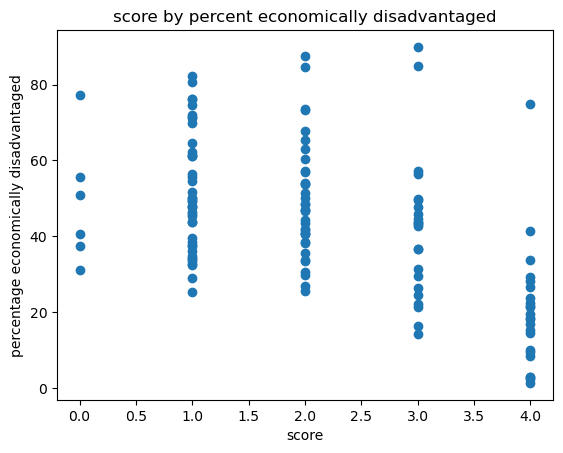

In [254]:
plt.scatter(x = 'score_achievement', y ='pct_econ_disadv', data = schools_with_scores)
plt.xlabel('score')
plt.ylabel('percentage economically disadvantaged')
plt.title('score by percent economically disadvantaged')

In [255]:
schools_with_scores.to_csv('../data/schools_with_scores.csv', index = False)

In [256]:
clean = pd.read_csv('../data/schools_with_scores.csv')
clean.head()

,name,total_students,econ_disadv,score_achievement,score_growth,score_absenteeism,score_grad,score_ready_grad,score_elpa,pct_econ_disadv
0,A. Z. Kelley Elementary,852,261,2.0,2.0,4.0,NaN,NaN,3.0,30.633803
1,Alex Green Elementary,234,153,2.0,2.0,4.0,NaN,NaN,2.0,65.384615
2,Amqui Elementary,458,246,2.0,4.0,4.0,NaN,NaN,4.0,53.711790
3,Andrew Jackson Elementary,496,122,3.0,4.0,4.0,NaN,NaN,2.0,24.596774
4,Antioch High School,1915,622,1.0,0.0,4.0,2.0,3.0,0.0,32.480418


# End of Instruction

### You want to plot the score distribution by zipcode for all zipcodes that have 10 or more schools.

In [260]:
### First, slice the schools dataframe so you only have the 'name' and 'zipcode' columns.  Save this as zips.

In [265]:
zips = schools[['name','zipcode']]
zips

,name,zipcode
0,A. Z. Kelley Elementary,37013
1,Alex Green Elementary,37189
2,Amqui Elementary,37115
3,Andrew Jackson Elementary,37138
4,Antioch High School,37013
...,...,...
162,West End Middle,37205
163,Westmeade Elementary,37205
164,Whites Creek High School,37189
165,William Henry Oliver Middle,37211


In [266]:
### Next, merge zips with_with_scores and name this dataframe test_zips

In [267]:
test_zips = pd.merge(   schools_with_scores,     zips, 
                                
                      
                     left_on = 'name', right_on = 'name', 
                                
                                 how = 'inner')

test_zips

,name,total_students,econ_disadv,score_achievement,score_growth,score_absenteeism,score_grad,score_ready_grad,score_elpa,pct_econ_disadv,zipcode
0,A. Z. Kelley Elementary,852,261,2.0,2.0,4.0,NaN,NaN,3.0,30.633803,37013
1,Alex Green Elementary,234,153,2.0,2.0,4.0,NaN,NaN,2.0,65.384615,37189
2,Amqui Elementary,458,246,2.0,4.0,4.0,NaN,NaN,4.0,53.711790,37115
3,Andrew Jackson Elementary,496,122,3.0,4.0,4.0,NaN,NaN,2.0,24.596774,37138
4,Antioch High School,1915,622,1.0,0.0,4.0,2.0,3.0,0.0,32.480418,37013
...,...,...,...,...,...,...,...,...,...,...,...
130,Waverly-Belmont Elementary School,494,107,4.0,2.0,4.0,NaN,NaN,NaN,21.659919,37204
131,West End Middle,503,112,3.0,0.0,2.0,NaN,NaN,NaN,22.266402,37205
132,Westmeade Elementary,422,132,3.0,4.0,4.0,NaN,NaN,3.0,31.279621,37205
133,William Henry Oliver Middle,985,252,2.0,0.0,4.0,NaN,NaN,2.0,25.583756,37211


In [272]:
### Now use value_counts() to find which zipcode has the most schools.
### (You can simply make a note, later in the course we learn how to automate this step)

In [274]:
test_zips.zipcode.value_counts()


zipcode
37013    15
37211    13
37207    13
37209    11
37214     9
37206     9
37216     8
37210     6
37115     6
37208     6
37203     5
37217     5
37076     4
37215     3
37204     3
37072     3
37205     3
37221     2
37220     2
37218     2
37080     2
37212     1
37027     1
37189     1
37138     1
37228     1
Name: count, dtype: int64

In [276]:
### Filter the test_zips dataframe to include only that zipcode

In [278]:
print(test_zips.shape)
print(test_zips['zipcode'].unique())
print(test_zips['zipcode'].dtype)


(135, 11)
[37013 37189 37115 37138 37221 37207 37208 37203 37209 37206 37220 37211
 37218 37216 37076 37214 37212 37204 37217 37072 37027 37215 37205 37080
 37210 37228]
int64


In [280]:
test_zips = test_zips.loc[test_zips['zipcode'] == 37013]
test_zips

,name,total_students,econ_disadv,score_achievement,score_growth,score_absenteeism,score_grad,score_ready_grad,score_elpa,pct_econ_disadv,zipcode
0,A. Z. Kelley Elementary,852,261,2.0,2.0,4.0,NaN,NaN,3.0,30.633803,37013
4,Antioch High School,1915,622,1.0,0.0,4.0,2.0,3.0,0.0,32.480418,37013
5,Antioch Middle,820,391,1.0,2.0,4.0,NaN,NaN,2.0,47.682927,37013
6,Apollo Middle,835,340,0.0,0.0,2.0,NaN,NaN,1.0,40.718563,37013
10,Cane Ridge Elementary,609,265,3.0,4.0,4.0,NaN,NaN,4.0,43.513957,37013
11,Cane Ridge High School,1858,635,1.0,0.0,3.0,2.0,2.0,0.0,34.176534,37013
16,Cole Elementary,761,332,2.0,2.0,4.0,NaN,NaN,4.0,43.626807,37013
59,John F. Kennedy Middle,842,316,1.0,0.0,4.0,NaN,NaN,0.0,37.529691,37013
67,Knowledge Academies High School,142,36,1.0,0.0,0.0,NaN,NaN,1.0,25.352113,37013
68,Knowledge Academy,148,43,1.0,3.0,3.0,NaN,NaN,1.0,29.054054,37013


In [282]:
### Create a barplot that shows the distribution of scores by school name for that zipcode.

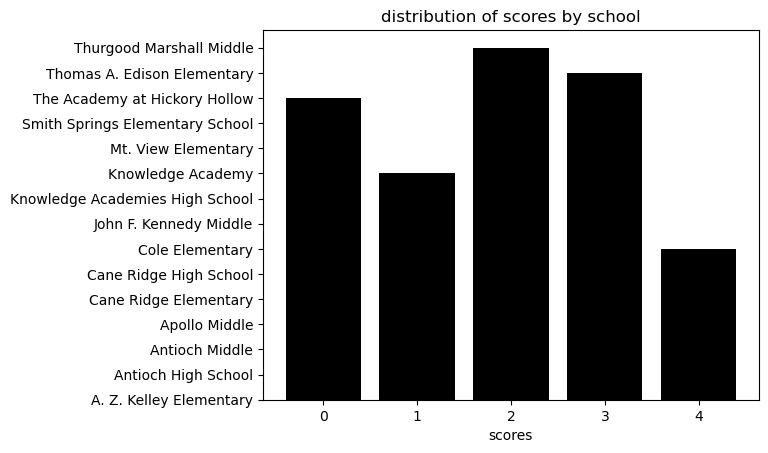

In [315]:
fig, ax = plt.subplots()
bars = ax.bar(test_zips['score_elpa'], test_zips['name'],color = 'black')
plt.xlabel('scores')
plt.title('distribution of scores by school')
plt.show()